In [2]:
# If you run at your local machine, (Windows or Mac), please skip this cell

#
# But if you run at Colab, Read me first ...
#
# If you run at Colab, you need using Jupyter external OS command 'wget' to get 2 python modules,
# before you can successully import them.
# please remove '#' such that those !wget can be run in advance.
#
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"

--2020-04-06 15:21:27--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47674 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  46.56K  --.-KB/s    in 0.02s   

2020-04-06 15:21:27 (2.28 MB/s) - ‘thinkdsp.py’ saved [47674/47674]

--2020-04-06 15:21:28--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22756 (22K) [text/plain]
Saving to: ‘thi

In [0]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

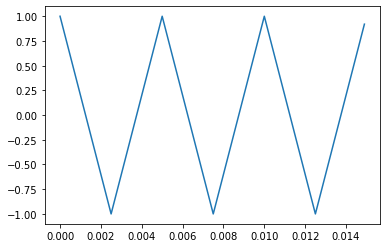

In [6]:
signal = thinkdsp.TriangleSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()

In [7]:

wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

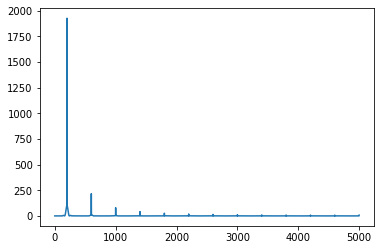

In [8]:
spectrum = wave.make_spectrum()
spectrum.plot()

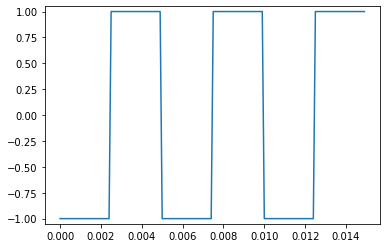

In [9]:
signal = thinkdsp.SquareSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
thinkplot.config(ylim=[-1.05, 1.05], legend=False)

In [10]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

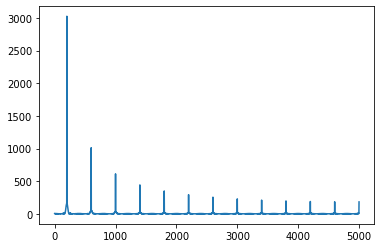

In [11]:
spectrum = wave.make_spectrum()
spectrum.plot()

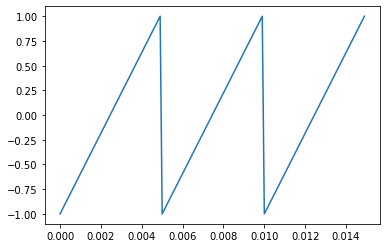

In [12]:
signal = thinkdsp.SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()


In [13]:

wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

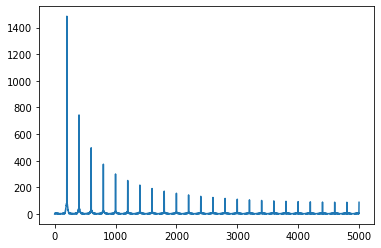

In [14]:
spectrum = wave.make_spectrum()
spectrum.plot()

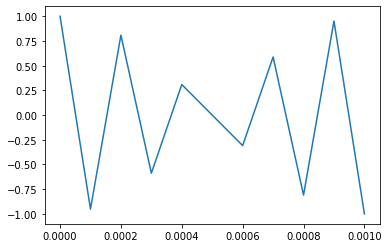

In [15]:
framerate = 10000

signal = thinkdsp.CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()

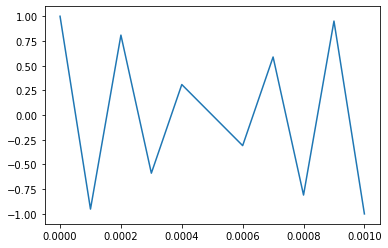

In [16]:
signal = thinkdsp.CosSignal(5500)
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()

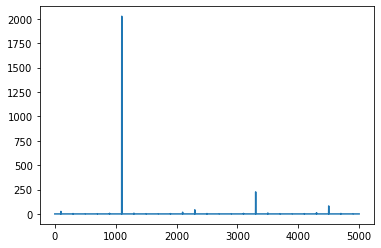

In [17]:
signal = thinkdsp.TriangleSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()

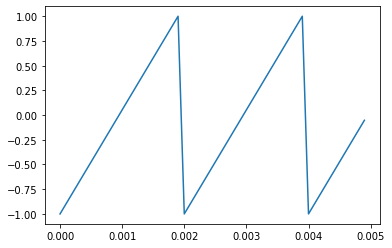

In [18]:
signal = thinkdsp.SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()

In [19]:
wave.make_audio()

In [20]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs

array([ 5.11590770e-13+0.00000000e+00j,  2.19700679e-13-1.34559298e-13j,
       -2.09548671e-13-6.74603523e-14j, ...,
        4.19606174e-13+3.46000979e-14j, -5.63280756e-13+5.74915022e-14j,
       -5.26315789e+02+0.00000000e+00j])

In [22]:
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

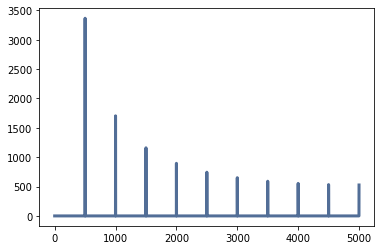

In [23]:

magnitude = np.absolute(hs)
thinkplot.plot(fs, magnitude)

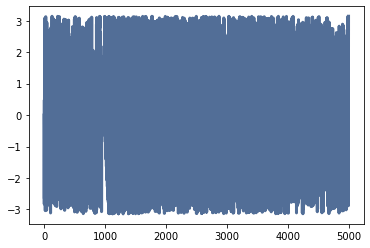

In [24]:
angle = np.angle(hs)
thinkplot.plot(fs, angle)


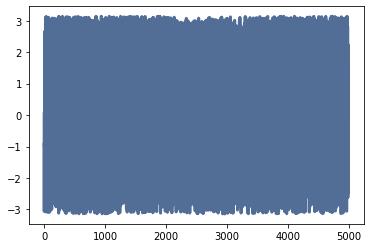

In [25]:
import random
random.shuffle(angle)
thinkplot.plot(fs, angle)

In [0]:
i = complex(0, 1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

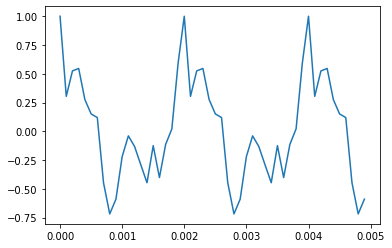

In [28]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()

In [29]:
wave2.make_audio()

In [30]:
wave.make_audio()

In [0]:
def view_harmonics(freq, framerate):
    signal = thinkdsp.SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='blue')
    thinkplot.show(xlabel='frequency', ylabel='amplitude')
    
    display(wave.make_audio())

In [33]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2);

interactive(children=(FloatSlider(value=100.0, description='freq', max=10000.0, min=100.0, step=100.0), FloatS…